In [1]:
#Part 1: Neural Network
#Part 2: Saving, Loading and Retraining Models
#Part 3: Activation Functions
#Part 4: Design Choices in Neural Networks

# Part 1: Neural Network

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

2023-01-27 12:57:29.944801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import Data

In [3]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# Visualize data

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


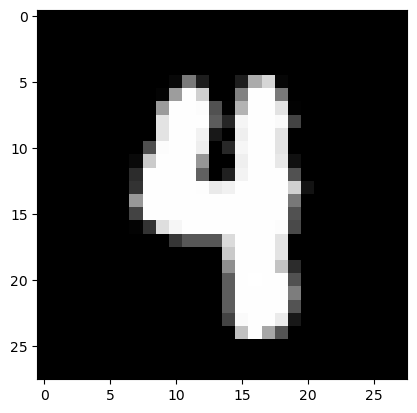

In [4]:
print("Label:",y_test[250:251])
plt.imshow(x_test[250:251].reshape(28,28), cmap='gray')
plt.show()

# Design a model

In [5]:

first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


2023-01-27 12:57:31.674426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 12:57:31.674979: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


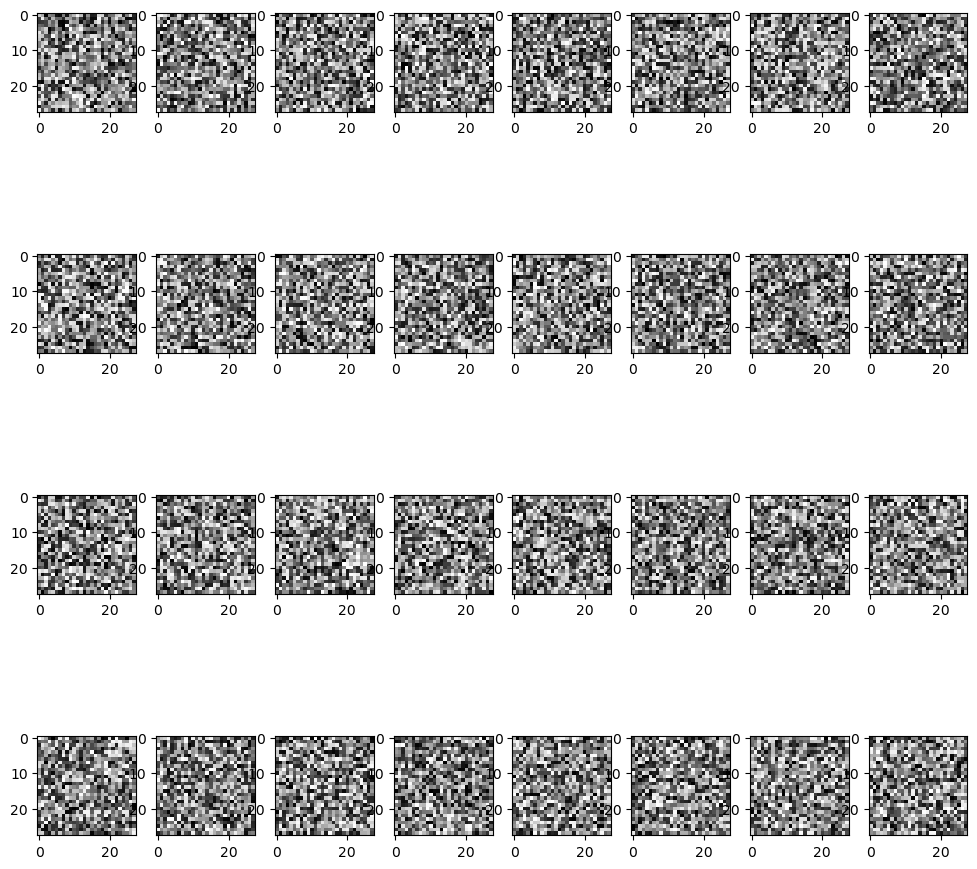

In [6]:

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

# Compiling a Model

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Training

In [8]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
469/469 [==============================] - 3s 5ms/step - loss: 1.5720 - accuracy: 0.5605
Epoch 2/2
469/469 [==============================] - 5s 10ms/step - loss: 0.5968 - accuracy: 0.8589


# Testing

In [9]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4161863327026367
Test accuracy: 0.892799973487854


# Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


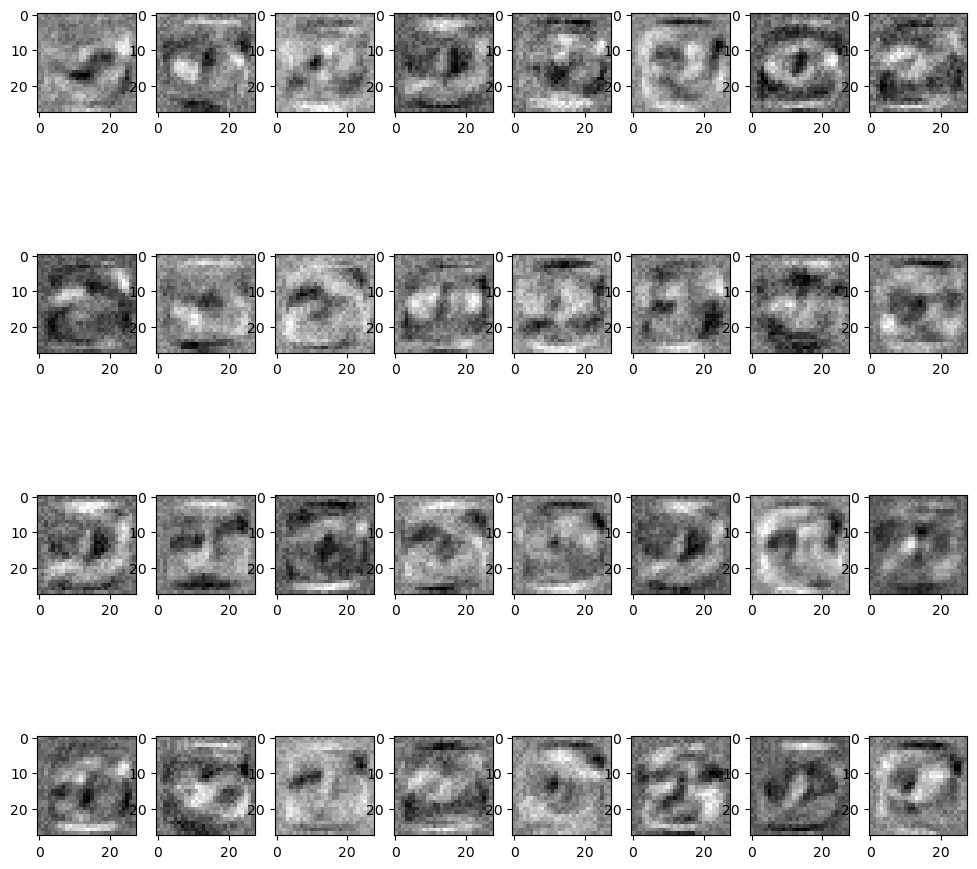

In [10]:

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

# Take away

This internal representation reflects Latent Variables
Each of the nodes will look for a specific pattern in the input
A node will get activated if input is similar to the feature it looks for
Each node is unique and often orthogonal to each other

# Prediction

In [11]:

# Write the index of the test sample to test
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 53ms/step
Prediction
 [3.53411958e-02 6.89145818e-04 5.36489068e-03 1.01174535e-02
 1.69587997e-03 7.76878178e-01 2.06299424e-02 7.58835056e-04
 1.39986739e-01 8.53770878e-03]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


# Part 2: Saving, Loading and Retraining Models

# Saving  a Model

In [12]:

# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Loading a model

In [13]:
#load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


# Retraining a model

In [14]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 11s 23ms/step - loss: 0.3629 - accuracy: 0.9028
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 0.2859 - accuracy: 0.9225
Test loss: 0.2651776373386383
Test accuracy: 0.9269000291824341


#Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

# 1.Sigmoid Activation Functions 

In [15]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 6280      
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.0420 - accuracy: 0.3950 - val_loss: 1.7723 - val_accuracy: 0.5502
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 1.5596 - accuracy: 0.5978 - val_loss: 1.3634 - val_accuracy: 0.6444
Epoch 3/10
469/469 [============

# 2.Relu Activation Function

In [16]:
# Write your code here 

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Use the same model design from the above cell 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 6280      
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.9244 - accuracy: 0.7345 - val_loss: 0.5087 - val_accuracy: 0.8576
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4643 - accuracy: 0.8711 - val_loss: 0.4046 - val_accuracy: 0.8888
Epoch 3/10
469/469 [============

In [17]:
#tanh

# Write your code here 

model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(784,)))
model.add(Dense(8, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Use the same model design from the above cell 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 6280      
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 1.1342 - accuracy: 0.7095 - val_loss: 0.6960 - val_accuracy: 0.8269
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5443 - accuracy: 0.8663 - val_loss: 0.4385 - val_accuracy: 0.8918
Epoch 3/10
469/469 [============

In [18]:
#linear

# Write your code here 

model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Use the same model design from the above cell 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 6280      
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.7335 - accuracy: 0.7940 - val_loss: 0.4067 - val_accuracy: 0.8889
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3718 - accuracy: 0.8954 - val_loss: 0.3330 - val_accuracy: 0.9075
Epoch 3/10
469/469 [============

In [19]:
#hard_sigmoid

# Write your code here 

model = Sequential()
model.add(Dense(8, activation='hard_sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='hard_sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Use the same model design from the above cell 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 6280      
                                                                 
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 2.0802 - accuracy: 0.3447 - val_loss: 1.8169 - val_accuracy: 0.4361
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 1.5883 - accuracy: 0.5510 - val_loss: 1.3826 - val_accuracy: 0.6233
Epoch 3/10
469/469 [============

### Activation functions summary

|Activation Function|Accuracy|Loss|Time_taken_to_train|
|---|---|----|----|
|sigmoid|0.8888|0.428|32.9 secs|
|relu|0.9207|0.2654|27.4 secs|
|tanh|0.9150|0.3050|24.8 secs|
|linear|0.9100|0.3172|47.6 secs|
|hard_sigmoid|0.8870|0.4037|43.5 secs|




# Tips

#Relu is commonly used in most hidden layers
#In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

###Design a model with Low Number of Nodes. For Example 8 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 6280      
                                                                 
 dense_20 (Dense)            (None, 32)                288       
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 4s 7ms/step - loss: 1.8345 - accuracy: 0.4481 - val_loss: 1.3579 - val_accuracy: 0.5955
Epoch 2/2
469/469 [==============================] - 3s 7ms/step - loss: 1.1031 - accuracy: 0.6513 - val_loss: 0.9194 - val_accuracy: 0.7329
Test loss: 0.919378399848938
Test 

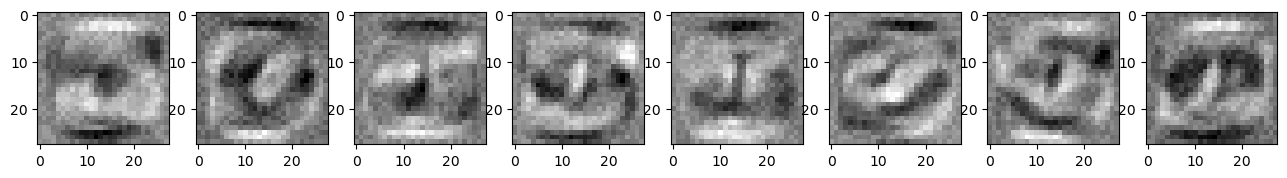

In [20]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

# Design a model with Higher Number of Nodes. For example 128

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 32)                4128      
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 4s 7ms/step - loss: 0.8824 - accuracy: 0.8106 - val_loss: 0.3741 - val_accuracy: 0.9062
Epoch 2/2
469/469 [==============================] - 3s 7ms/step - loss: 0.2986 - accuracy: 0.9188 - val_loss: 0.2357 - val_accuracy: 0.9340
Test loss: 0.23567047715187073

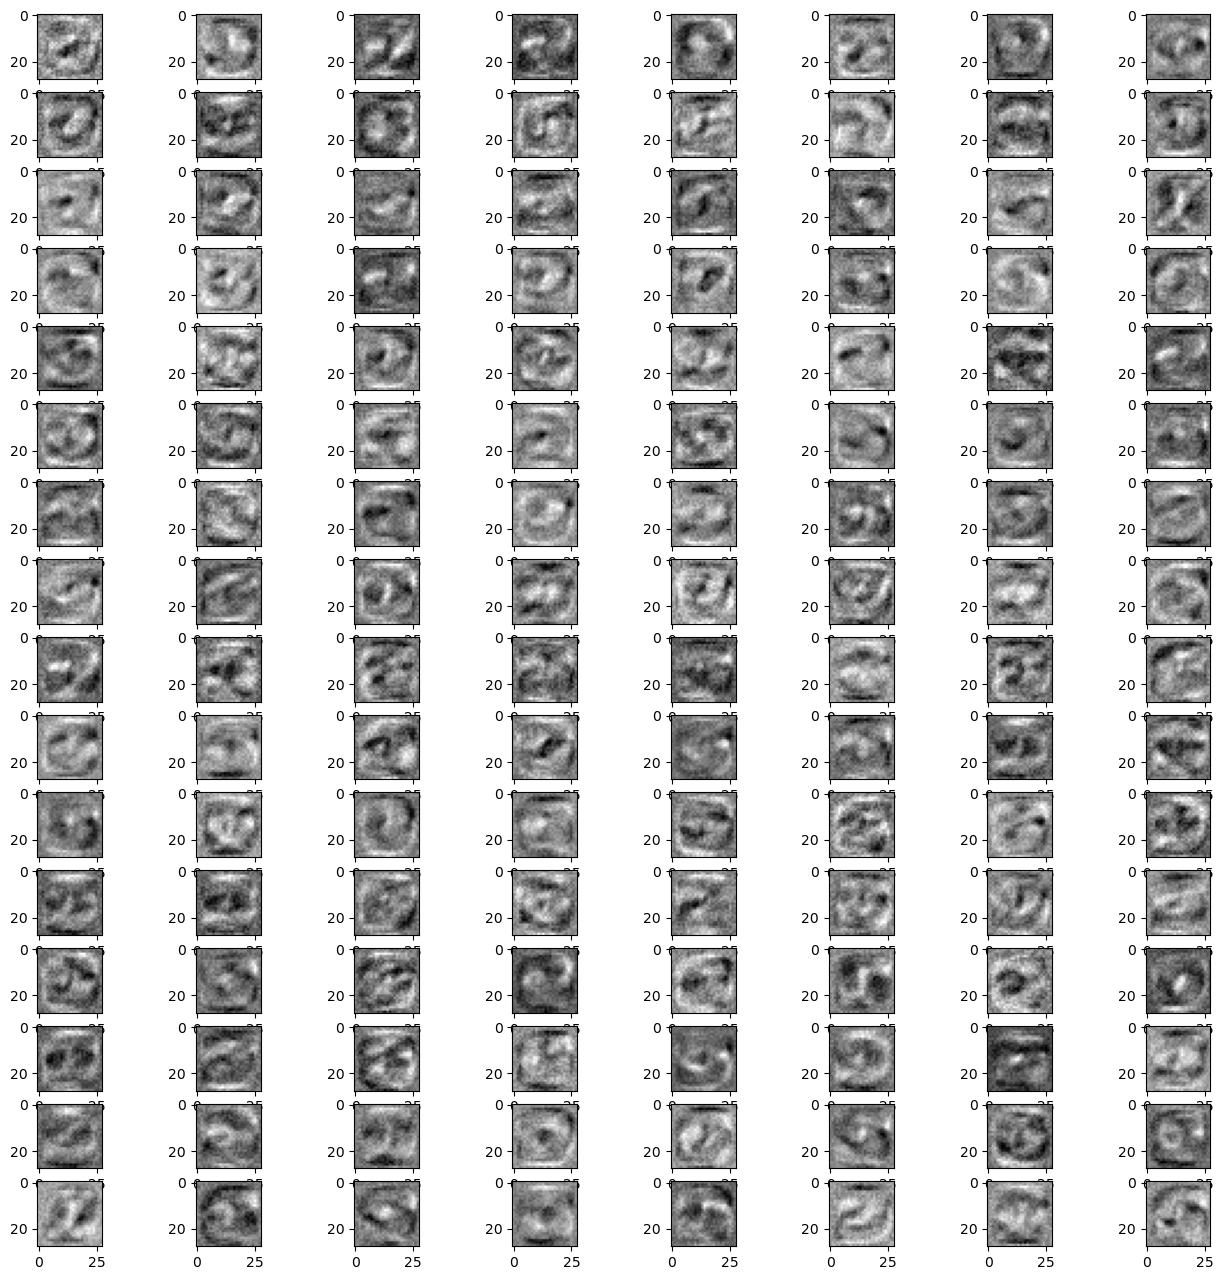

In [21]:
# Write your code here 

first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()
# Use the same layer design from the above cell 
     

# Lower number of Layers. For example 1 hidden layer

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                25120     
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 3s 7ms/step - loss: 0.8605 - accuracy: 0.8255 - val_loss: 0.4170 - val_accuracy: 0.9039
Epoch 2/2
469/469 [==============================] - 2s 5ms/step - loss: 0.3491 - accuracy: 0.9101 - val_loss: 0.2914 - val_accuracy: 0.9204
Test loss: 0.2913524806499481
Test accuracy: 0.9204000234603882
Shape of First Layer (784, 32)
Visualization of First Layer


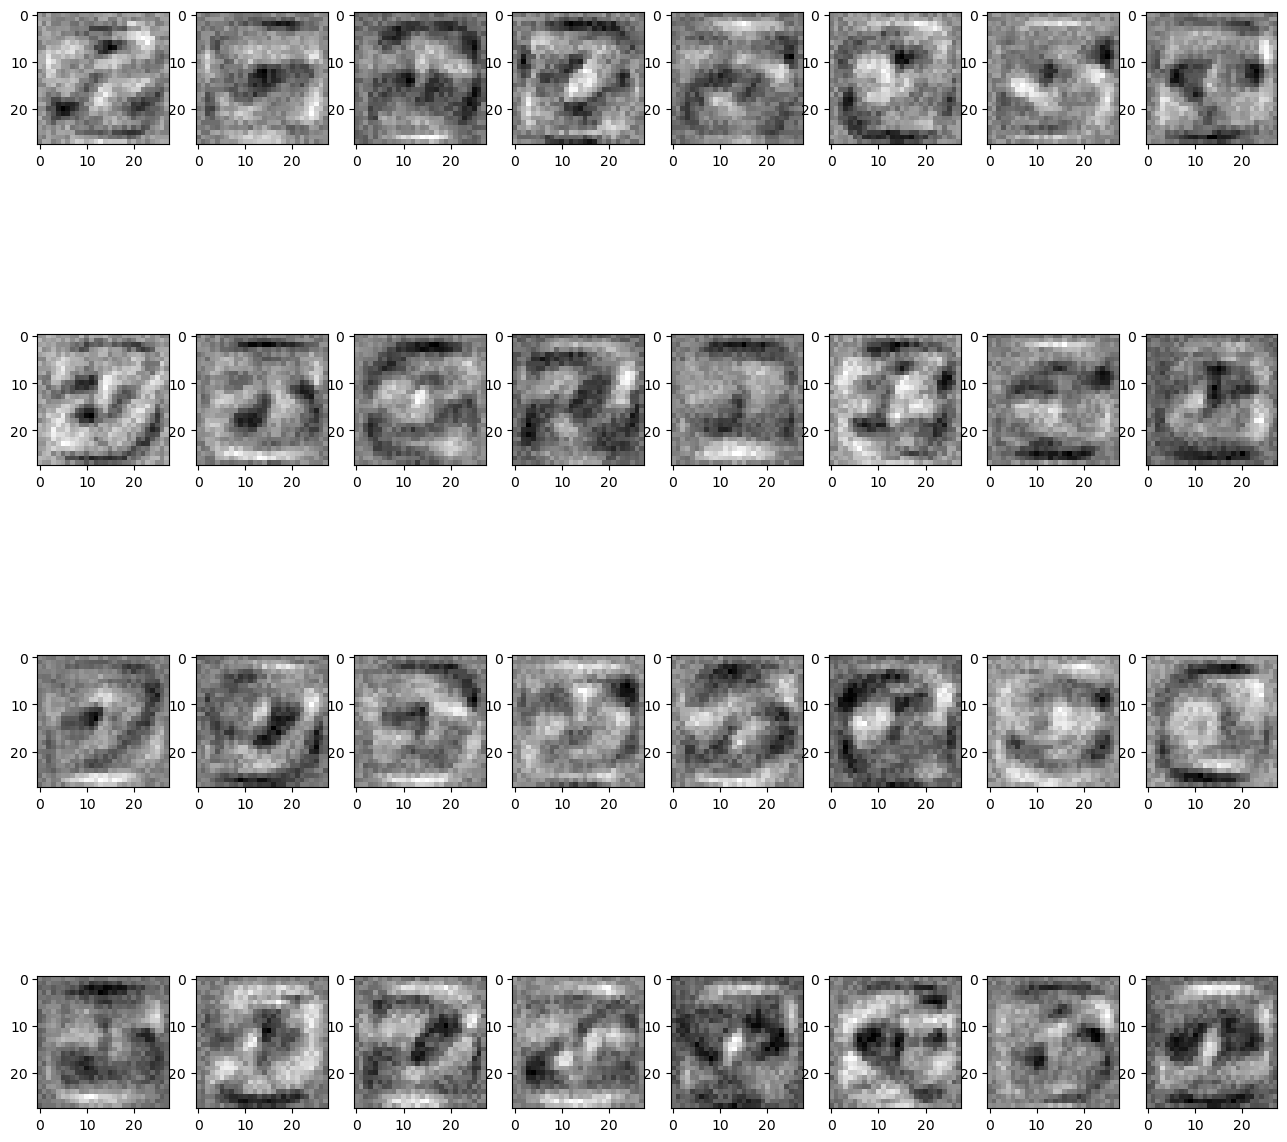

In [22]:
# Write your code here 
first_layer_size = 32

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()


# Lower number of Layers. For example 4 hidden layers

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                25120     
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================]

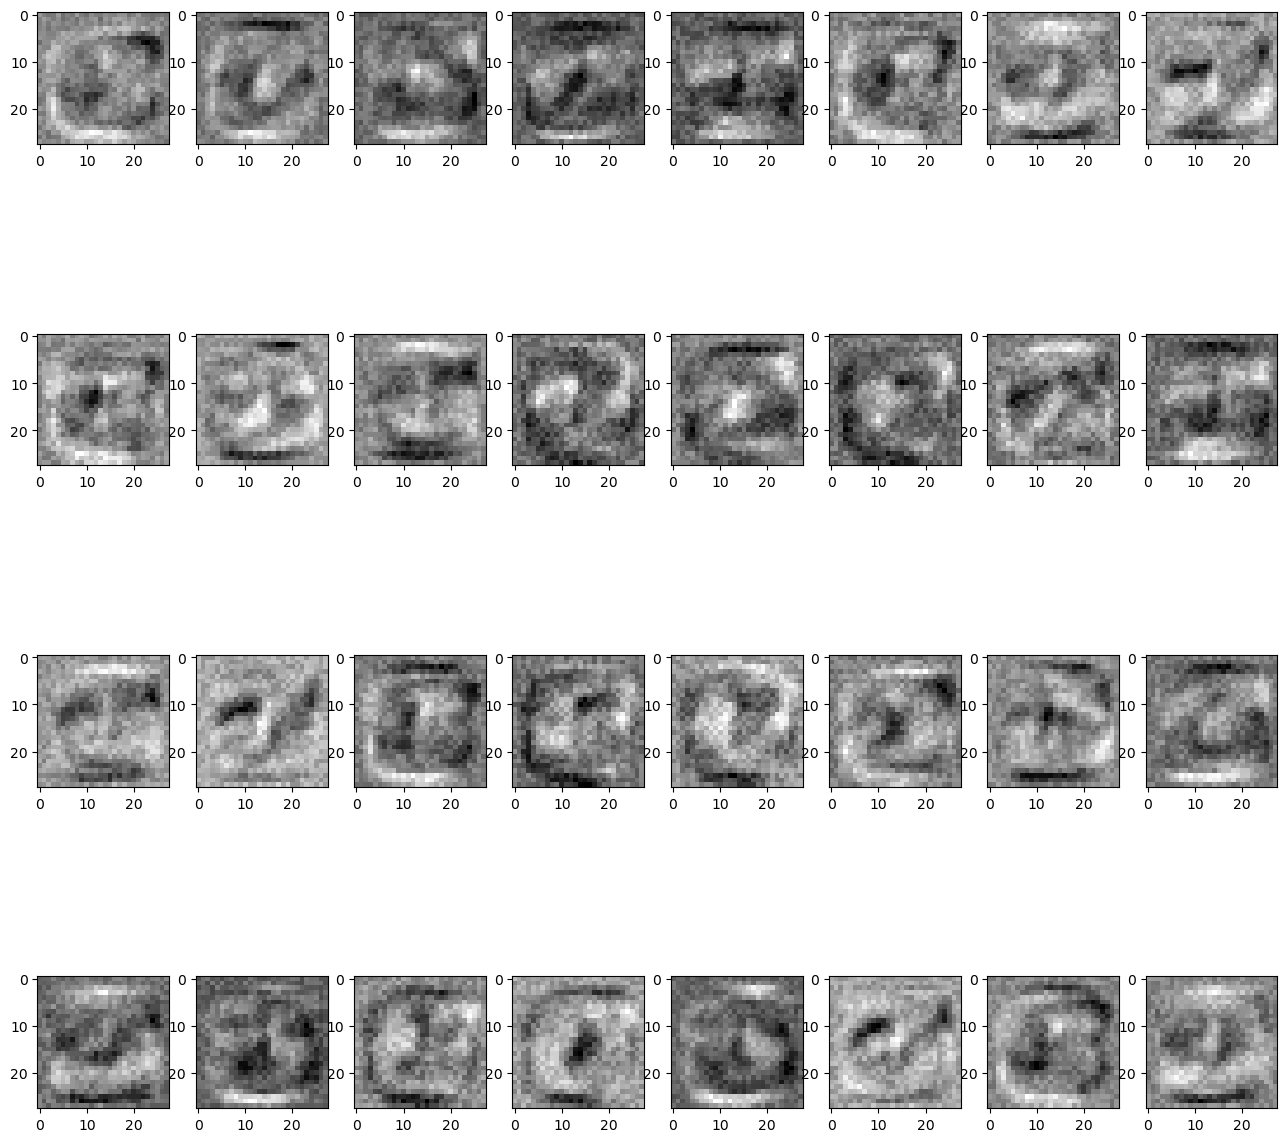

In [23]:
# Write your code here 
first_layer_size = 32

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

#  Compare the performances and list down the results in Tabular format and submit.

|Model_name|Accuracy|Loss|
|----|----|---|
|seqential_6 layer size 8|0.7329|0.9193|
|seqential_7 layer size 128|0.9340|0.2356|
|seqential_8 layer no 1|0.9204|0.2913|
|seqential_9 layer no 4|0.8327|0.7102|
